In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

<h1><b>Correlation Analysis

In [35]:
indices = yf.download(tickers=["^IXIC", "^NSEI"], start="2010-01-01", end = "2023-05-01")
indices.dropna(inplace=True)
nasdaq=indices.loc[:,'Adj Close']['^IXIC']
nse=indices.loc[:,'Adj Close']['^NSEI']

prices_df = pd.concat([nasdaq, nse], axis=1, keys=['NASDAQ', 'NIFTY'])
prices_df

[*********************100%***********************]  2 of 2 completed


,NASDAQ,NIFTY
Date,,
2010-01-04,2308.419922,5232.200195
2010-01-05,2308.709961,5277.899902
2010-01-06,2301.090088,5281.799805
2010-01-07,2300.050049,5263.100098
2010-01-08,2317.169922,5244.750000
...,...,...
2023-04-24,12037.200195,17743.400391
2023-04-25,11799.160156,17769.250000
2023-04-26,11854.349609,17813.599609


In [40]:
prices_df.corr()

,NASDAQ,NIFTY
NASDAQ,1.000000,0.951314
NIFTY,0.951314,1.000000


Here, coefficient of correlation is very close to 1, which shows positive and strong relationship between both the indices.

In [43]:
prices_df["Nasdaq_lead"]=prices_df.NASDAQ.shift(-1)  
prices_df["NSEI_lead"]=prices_df.NIFTY.shift(-1)
prices_df


,NASDAQ,NIFTY,Nasdaq_lead,NSEI_lead
Date,,,,
2010-01-04,2308.419922,5232.200195,2308.709961,5277.899902
2010-01-05,2308.709961,5277.899902,2301.090088,5281.799805
2010-01-06,2301.090088,5281.799805,2300.050049,5263.100098
2010-01-07,2300.050049,5263.100098,2317.169922,5244.750000
2010-01-08,2317.169922,5244.750000,2312.409912,5249.399902
...,...,...,...,...
2023-04-24,12037.200195,17743.400391,11799.160156,17769.250000
2023-04-25,11799.160156,17769.250000,11854.349609,17813.599609
2023-04-26,11854.349609,17813.599609,12142.240234,17915.050781


In [44]:
prices_df.corr()

,NASDAQ,NIFTY,Nasdaq_lead,NSEI_lead
NASDAQ,1.000000,0.951314,0.999563,0.951650
NIFTY,0.951314,1.000000,0.950774,0.999632
Nasdaq_lead,0.999563,0.950774,1.000000,0.951295
NSEI_lead,0.951650,0.999632,0.951295,1.000000


> Indented block
<h1><b>Lead-Lag Relationship</b></h1>







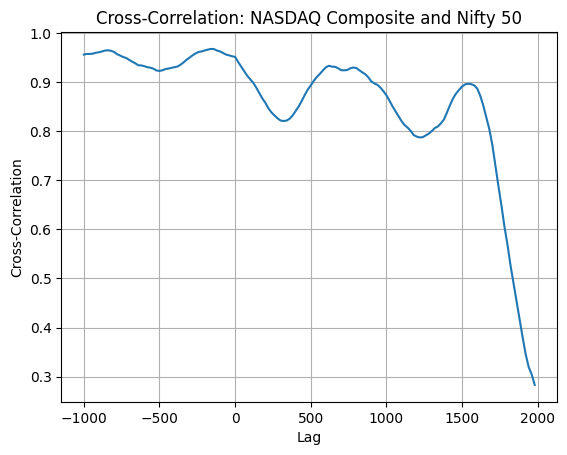

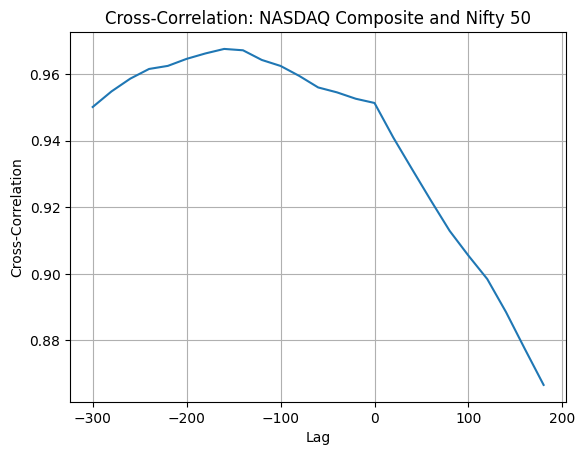

In [37]:
cross_corr = np.correlate(nasdaq, nse, mode='full')

lags = np.arange(-1000, 2000, 20)
lags2= np.arange(-300, 200, 20)
cross_corr = []
cross_corr2 = []

for lag in lags :
    shifted_nse = prices_df['NIFTY'].shift(lag)
    correlation = prices_df['NASDAQ'].corr(shifted_nse)
    cross_corr.append(correlation)

plt.plot(lags, cross_corr)
plt.title('Cross-Correlation: NASDAQ Composite and Nifty 50')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid(True)
plt.show()

for lag in lags2 :
    shifted_nse2 = prices_df['NIFTY'].shift(lag)
    correlation2 = prices_df['NASDAQ'].corr(shifted_nse2)
    cross_corr2.append(correlation2)

plt.plot(lags2, cross_corr2)
plt.title('Cross-Correlation: NASDAQ Composite and Nifty 50')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid(True)
plt.show()

<b>Inferences from above charts:</b>

<li>The stronges correlation between the two indices appears at -150 days
<li>The NASDAQ Composite index consistently lags behind Nifty by more than 150 days in short term and for more than 500 days in long run between 1500 and 2000 days
<li>Thus, NIFTY 50 shall be used for parameter optimization because of its consistent leading behaviour

<h1><b>Indicator Coding

In [24]:
sma_period = 20  
sma_nasdaq = prices_df['NASDAQ'].rolling(sma_period).mean()
sma_nifty = prices_df['NIFTY'].rolling(sma_period).mean()
# The average true range is:
atr_period = 10  
high_low_nasdaq = prices_df['NASDAQ'].diff().abs()
high_low_nifty = prices_df['NIFTY'].diff().abs()
true_range_nasdaq = high_low_nasdaq.rolling(atr_period).mean()
true_range_nifty = high_low_nifty.rolling(atr_period).mean()

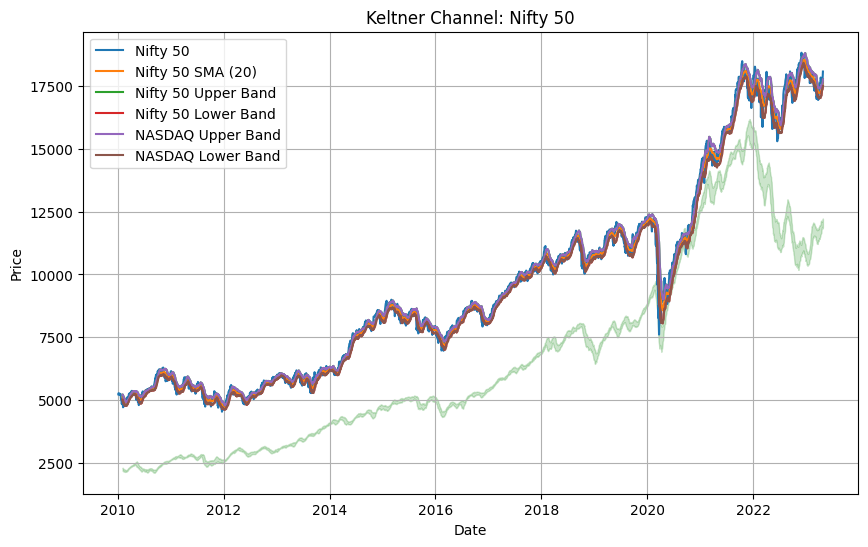

In [33]:
mult = 2.0 
upper_band_nifty = sma_nifty + (mult * true_range_nifty)
lower_band_nifty = sma_nifty - (mult * true_range_nifty)
upper_band_nasdaq = sma_nasdaq + (mult * true_range_nasdaq)
lower_band_nasdaq = sma_nasdaq - (mult * true_range_nasdaq)
plt.figure(figsize=(10, 6))
plt.plot(prices_df['NIFTY'], label='Nifty 50')
plt.plot(sma_nifty, label=f'Nifty 50 SMA ({sma_period})')
plt.plot(upper_band_nifty, label='Nifty 50 Upper Band')
plt.plot(lower_band_nifty, label='Nifty 50 Lower Band')
plt.plot(upper_band_nifty, label='NASDAQ Upper Band')
plt.plot(lower_band_nifty, label='NASDAQ Lower Band')
plt.fill_between(prices_df.index, lower_band_nifty, upper_band_nifty, alpha=0.2, color='gray')
plt.fill_between(prices_df.index,  lower_band_nasdaq, upper_band_nasdaq, alpha=0.2, color='green')
plt.title('Keltner Channel: Nifty 50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()